# Stage III (Distributions and Hypothesis Testing)

## Team 4: Member task (Reetika Sarkar)

### Task 1: Use state data to fit a distribution to COVID-19 new cases.

Import required libraries.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from IPython.display import Image

Read csv files.

In [2]:
f_cases = pd.read_csv("../../../../data/stage_3/states_newcases.csv")
f_cases.set_index('week', inplace=True)
f_cases.head()

,AZ,CO,GA,MI,NC,WA
week,,,,,,
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.000000
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.000000
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.000000
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.000000
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.013132


In [3]:
f_deaths = pd.read_csv("../../../../data/stage_3/states_newdeaths.csv")
f_deaths.set_index('week', inplace=True)
f_deaths.head()

,AZ,CO,GA,MI,NC,WA
week,,,,,,
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0


Generate distribution statistics for cases in NC and plot the distribution.

In [4]:
#distribution statistics for NC 
print(f_cases['NC'].agg(['min','max','mean','std']).round(decimals=2))
print("skewness:", st.skew(f_cases.NC, bias=False))
print("kurtosis:", st.kurtosis(f_cases.NC, bias=False))

min       0.00
max     281.68
mean     31.72
std      47.75
Name: NC, dtype: float64
skewness: 3.5238304847141193
kurtosis: 13.805685047332169


The distribution statistics for the state of NC are:
* min      : 0
* max      : 281.68
* mean     : 31.72
* std      : 47.75
* skewness : 3.52
* kurtosis : 13.81

The data is skewed to the right and has a tall peak (compared to a standard normal distribution). The mean number of new cases are 32.

<AxesSubplot:>

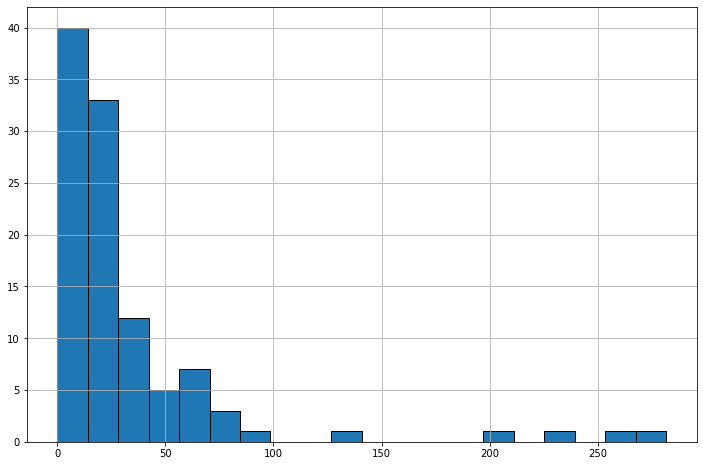

In [5]:
f_cases.NC.hist(bins=20, ec='black', figsize=(12,8))

* The histogram above is skewed to the right.

* Data points are all positive.

The histogram above resembles that of a Gamma distribution or Poisson distribution (although the given data is discrete). The x axis represents the counts of new COVID-19 cases while the y-axis represents the frequencies. 

The distribution appears to be **unimodal** with maximum number of new case counts at 0.

In order to fit a Gamma distribution (with estimates of parameters obtained using method of moments), first compute the estimates and then fit using `gamma.pdf()` in `scipy.stats.distributions`.

In [6]:
#compute mean and variances of all the states (sample)
cases_means = f_cases.mean()
print("Means:")
print(cases_means)

cases_var = f_cases.var()
print("Variances:")
print(cases_var)

Means:
AZ    35.243226
CO    29.864717
GA    22.811917
MI    30.395326
NC    31.723513
WA    24.132204
dtype: float64
Variances:
AZ    2430.250785
CO    1576.869177
GA     795.999649
MI    1559.451064
NC    2279.854974
WA    1710.163913
dtype: float64


In [7]:
#compute alpha and beta estimates for each state using Method of Moments
alpha_mom_cases = cases_means ** 2/cases_var
beta_mom_cases = cases_var/cases_means
print(alpha_mom_cases)
print(beta_mom_cases)

AZ    0.511093
CO    0.565615
GA    0.653748
MI    0.592437
NC    0.441423
WA    0.340531
dtype: float64
AZ    68.956535
CO    52.800406
GA    34.894027
MI    51.305621
NC    71.866410
WA    70.866462
dtype: float64


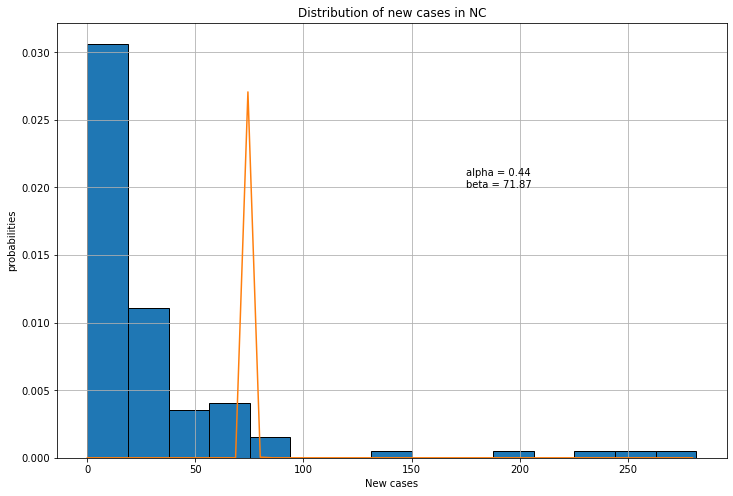

In [8]:
from scipy.stats.distributions import gamma

#plot for NC
f_cases['NC'].hist(density=True, bins=15, ec='black', figsize=(12,8))
label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom_cases[4], beta_mom_cases[4])
plt.annotate(label, xy=(175,0.020))
plt.title('Distribution of new cases in NC')
plt.xlabel('New cases')
plt.ylabel('probabilities')
plt.plot(np.linspace(0,280), gamma.pdf(np.linspace(0,280), alpha_mom_cases[4], beta_mom_cases[4]))

The plot for the distribution of new cases in NC was made over the range of minimum and maximum cases. The fitted Gamma distribution with parameter estimates obtained using Method of Moments as alpha=0.44 and beta=71.87 does not fit the data well. It could be due to the data being discrete while the theoretical distribution is continuous. The peak for Gamma distribution is much to the right of the data values.

**Compare the distribution to five other states and draw inferences.**

In [9]:
#distribution statistics for new cases in selected states
print(f_cases.agg(['min','max','mean','std']).round(decimals=2))
print("skewness:", st.skew(f_cases, bias=False))
print("kurtosis:", st.kurtosis(f_cases, bias=False))

          AZ      CO      GA      MI      NC      WA
min     0.00    0.00    0.00    0.00    0.00    0.00
max   272.34  238.23  180.15  205.42  281.68  266.20
mean   35.24   29.86   22.81   30.40   31.72   24.13
std    49.30   39.71   28.21   39.49   47.75   41.35
skewness: [2.92277666 3.10518715 2.8291612  2.53167592 3.52383048 4.06294879]
kurtosis: [ 9.74475274 11.70021266 10.54949935  7.58589684 13.80568505 17.89929413]


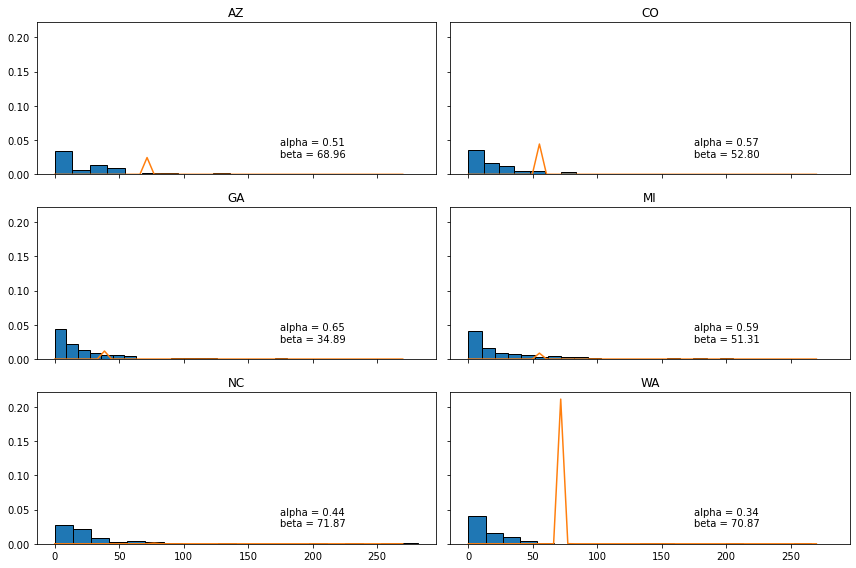

In [10]:
#plots of distribution of new cases for all chosen states

axs = f_cases.hist(density=True, bins=20, ec='black', figsize=(12,8),sharex=True,sharey=True,grid=False)

for ax in axs.ravel():
    #Get state
    s = ax.get_title()
    
    #Plot fitted distribution
    x = np.linspace(0,270)
    ax.plot(x, gamma.pdf(x, alpha_mom_cases[s], beta_mom_cases[s]))
    
    #Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom_cases[s], beta_mom_cases[s])
    ax.annotate(label, xy=(175,0.025))
    
plt.tight_layout()

* Maximum number of new cases recorded in Arizona, Colorado and Washington are similar to North Carolina. Georgia and Michigan have lower maximum values.
* Barring Arizona, all other states have mean number of new cases lower than NC.
* The standard deviation of new cases is higher in NC than that in CO, GA, MI and WA while AZ has a higher standard deviation than NC.
* All the state datasets are skewed to the right with NC and WA having higher level of skewness than others.
* NC and WA also have the highest levels of kurtosis.
* From the plots above it can be seen that or each of the chosen states, Gamma distribution is not a good fit. The parameters for fitting each state's data were the estimates obtained using Method of Moments. All states have peaks much further away from the actual peak in the data. These indicate that Gamma distribution is not appropriate to fit the counts of new COVID-19 cases.

These estimates could be improved somewhat by using Maximum Likelihood estimates but they are not likely to show a significant improvement in fit owing to the inconsistencies in the nature of actual data (discrete counts) versus the distribution used to fit (continuous). Poisson distribution which models counts for rare events seems to be an appropriate model to fit the given data.

### Task 2: Model a Poisson distribution on new COVID-19 cases and deaths for all states. Describe how it is different from model worked first.

For fitting Poisson distribution, we need to first compute the parameter estimates ($\lambda$ in Poisson distribution). These estimates are computed using Method of Moments, i.e., the sample mean for each state. These estimates can be used to fit the theoretical probability distribution. The theoretical probabilities can be computed using `poisson.pmf` in `scipy.stats.poisson`.

In [11]:
#compute mean deaths for each of the selected states and 
#use them as respective lambda values for Poisson distribution fitting
deaths_means = f_deaths.mean()
lam_deaths = deaths_means
print(lam_deaths)

#use means of new cases for states as respective lambda values for Poisson distribution fitting
lam_cases = cases_means
print(lam_cases)

AZ    0.491352
CO    0.267027
GA    0.407394
MI    0.441240
NC    0.270927
WA    0.193390
dtype: float64
AZ    35.243226
CO    29.864717
GA    22.811917
MI    30.395326
NC    31.723513
WA    24.132204
dtype: float64


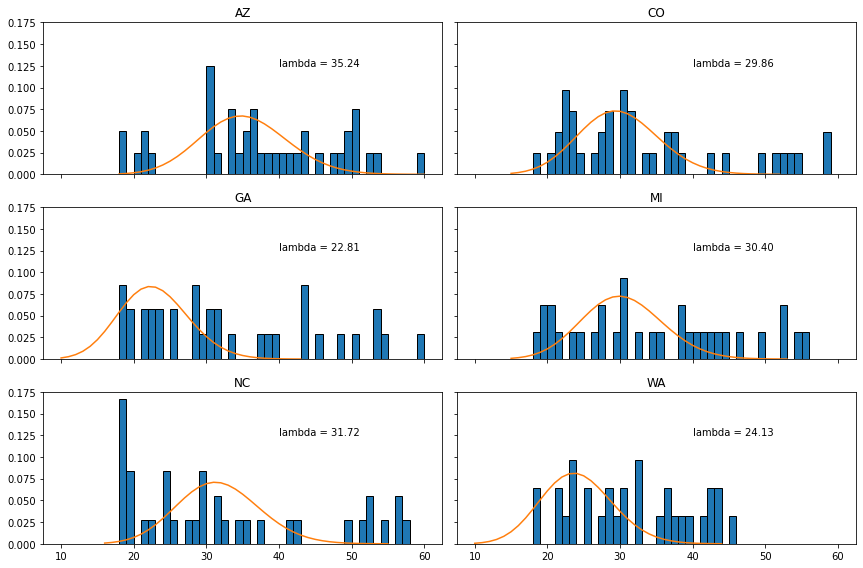

In [12]:
#plots of distribution of new cases for all chosen states

from scipy.stats import poisson

axs = f_cases.hist(density=True, bins=np.arange(poisson.ppf(0.001,lam_cases.AZ),poisson.ppf(0.99995,lam_cases.AZ)), ec='black', figsize=(12,8), sharex=True, sharey=True, grid=False)

for ax in axs.ravel():
    #Get state
    s = ax.get_title()
    
    #Plot fitted distribution
    x=np.arange(poisson.ppf(0.001,lam_cases[s]),poisson.ppf(0.99995,lam_cases[s]))
    ax.plot(x, poisson.pmf(x, lam_cases[s]))
    
    #Annotate with parameter estimates
    label = 'lambda = {0:.2f}'.format(lam_cases[s])
    ax.annotate(label, xy=(40,0.125))
    
plt.tight_layout()

* The graphs above show that Poisson model fits the distribution of new COVID-19 cases better than Gamma distribution. 
* The peaks for theoretical probabilities for all states resemble those of the actual sample observations.
* The peaks of the Poisson probabilities are however, not exactly the same as the peaks in the histogram of data points. This could be due to high variance in the new cases counts (as can be seen from the summary of descriptive statistics of the chosen states). Poisson distribution fits well when mean and variance are very close to each other which is not true for the new COVID-19 cases.

In [13]:
#distribution statistics for COVID-19 deaths in selected states
print(f_deaths.agg(['min','max','mean','std']).round(decimals=2))
print("skewness:", st.skew(f_deaths, bias=False))
print("kurtosis:", st.kurtosis(f_deaths, bias=False))

        AZ    CO    GA    MI    NC    WA
min   0.00  0.00  0.00  0.00  0.00 -0.04
max   2.38  1.29  3.45  1.36  0.95  0.84
mean  0.49  0.27  0.41  0.44  0.27  0.19
std   0.50  0.26  0.41  0.40  0.23  0.15
skewness: [1.78161602 1.5487252  4.194952   0.85314833 1.22928521 1.34608844]
kurtosis: [ 3.18878367  2.52478214 28.06705754 -0.46896707  0.80780915  2.14433921]


The minimum and maximum of number of deaths can be used to model the Poisson distribution for deaths.

* It can also be seen that mean deaths per 100,000 persons are high in AZ, MI and GA. 
* The standard deviations of deaths are closer to mean values for all states chosen when compared with the data pertaining to new COVID-19 cases. This indicates that Poisson model might be a good fit to this data.

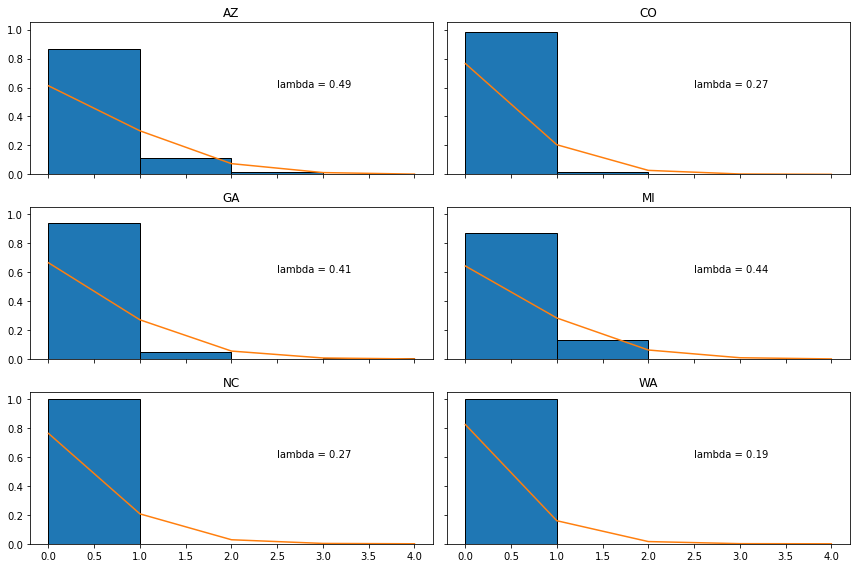

In [14]:
#plots of distribution of deaths for all chosen states

axs = f_deaths.hist(density=True, bins=np.arange(poisson.ppf(0.0001,lam_deaths.AZ),poisson.ppf(0.99995,lam_deaths.AZ)), ec='black', figsize=(12,8), sharex=True, sharey=True, grid=False)

for ax in axs.ravel():
    #Get state
    s = ax.get_title()
    
    #Plot fitted distribution
    x=np.arange(poisson.ppf(0.0001,lam_deaths.AZ),poisson.ppf(0.99995,lam_deaths.AZ))
    ax.plot(x, poisson.pmf(x, lam_deaths[s]))
    
    #Annotate with parameter estimates
    label = 'lambda = {0:.2f}'.format(lam_deaths[s])
    ax.annotate(label, xy=(2.5,0.6))
    
plt.tight_layout()

* The distribution plots for deaths are fit well by the Poisson distribution. The peaks in the data are aligned with the theoretical probabilities for all the selected states.

### Task 3: Perform correlation between Enrichment data variables and COVID-19 cases to observe any patterns.

* I will compute correlations between COVID-19 data (new cases and deaths) and the enrichment datasets chosen (presidential election results, gubernatorial election results and senate election results.

* The election results data takes into account the difference in votes won by Democrats versus Republicans. A negative difference indicates that Republicans won in the state, while a positive difference indicates that Democrats won.

* The correlations are computed based on state averages. Although the presidential election results have data for all states, data for senate elections is available for 34 states and data for governor elections is available for 11 states.

* After computing the COVID-19 aggregates of new cases and deaths, the suitable data files pertaining to the enrichment datasets are read.

* COVID-19 counts are normalized per 100,000 persons in the state. The election results are normalized per 100 persons in the state.

First compute the statewise means of normalized number of new COVID-19 cases and deaths.

In [15]:
f1 = pd.read_csv("../../../../data/stage_3/covid_confirmed_usafacts.csv")
f2 = pd.read_csv("../../../../data/stage_3/covid_deaths_usafacts.csv")
f3 = pd.read_csv("../../../../data/stage_3/covid_county_population_usafacts.csv")

f1.columns = f1.columns.str.replace(' ', '_')
f1.columns = f1.columns.str.lower()

f2.columns = f2.columns.str.replace(' ', '_')
f2.columns = f2.columns.str.lower()

f3.columns = f3.columns.str.replace(' ', '_')
f3.columns = f3.columns.str.lower()

f1_1 = f1[f1['countyfips'] != 0]
f2_1 = f2[f2['countyfips'] != 0]
f3_1 = f3[f3['countyfips'] != 0]

In [16]:
#state total populations
county_pop = f3_1.drop(columns = ['countyfips'])
pop_states = county_pop.groupby('state').sum()
#convert state total populations to a series
p = pop_states.squeeze()

In [17]:
#new daily cases for states
cases_states = f1_1.drop(columns = ['countyfips','statefips','2020-01-22','2020-01-23','2020-01-24',
                                                 '2022-02-06','2022-02-07'])
#total cases by state
cases_states_total = cases_states.groupby('state').sum()
#new daily cases by state
new_cases_daily = cases_states_total.diff(axis=1)
#delete data for 2020-01-25
new_cases_daily = new_cases_daily.drop(columns = ['2020-01-25'])


#mean number of new cases by states
mean_newcases = new_cases_daily.mean(axis=1)

#normalized means per 100,000 persons by state populations
norm_mean_newcases = mean_newcases/p*100000
print(norm_mean_newcases.head())

state
AK    39.395078
AL    34.096766
AR    34.303161
AZ    35.243078
CA    27.496285
dtype: float64


In [18]:
#new deaths for states
deaths_states = f2_1.drop(columns = ['countyfips','statefips','2020-01-22','2020-01-23','2020-01-24',
                                                 '2022-02-06','2022-02-07'])
#total deaths by state
deaths_states_total = deaths_states.groupby('state').sum()

#new deaths by state
new_deaths_daily = deaths_states_total.diff(axis=1)
#delete data for 2020-01-25
new_deaths_daily = new_deaths_daily.drop(columns = ['2020-01-25'])

#mean number of new cases by states
mean_deaths = new_deaths_daily.mean(axis=1)

#normalized means per 100,000 persons by state populations
norm_mean_deaths = mean_deaths/p*100000
print(norm_mean_deaths.head())

state
AK    0.193255
AL    0.477466
AR    0.435957
AZ    0.491223
CA    0.273684
dtype: float64


Read data pertaining to enrichment datasets (2020 election results), normalize counts per 100 persons in the state and compute respective correlations with new COVID-19 cases.

**A) Presidential election results 2020**

In [19]:
president = pd.read_csv("../../../../data/stage_3/diff_president_votes_states.csv")
president = president.drop(['total_pop'], axis=1)
president.set_index('state', inplace=True)
print(president.head())

       diff_president_votes
state                      
DE                    95665
DC                   298737
FL                  -371686
GA                    11779
HI                   169266


In [20]:
#compute difference in votes between Democrat and Republican party 
president_votes_norm = president.div(p, axis=0)
president_votes_norm = president_votes_norm*100
president_votes = president_votes_norm.squeeze()
print(president_votes.head())

state
AK    -4.987663
AL   -12.063995
AR   -11.157617
AZ     0.143665
CA    12.917023
Name: diff_president_votes, dtype: float64


In [21]:
#correlation between presidential votes in the states and new COVID-19 cases
president_votes.corr(norm_mean_newcases)

-0.5656784038553653

In [22]:
#correlation between presidential votes in the states and COVID-19 deaths
president_votes.corr(norm_mean_deaths)

-0.3412439360532439

**Interpretation:**

* Correlation coefficient between presidential votes in the states and new COVID-19 cases in the US is -0.566. It means that there is a negative linear relationship between difference in votes between Democrat and Republican party, and the incidence of COVID-19 cases. A lower or negative difference (meaning Republicans got more votes) is associated with increase in new cases.

* Correlation coefficient between presidential votes in the states and COVID-19 deaths in the US is -0.341. It means that there is a negative linear relationship between difference in votes between Democrat and Republican party, and COVID-19 deaths. A lower or negative difference (meaning Republicans got more votes) is associated with increase in deaths.

**B) Gubernatorial election results 2020**

In [23]:
governor = pd.read_csv("../../../../data/stage_3/state_governor_votes.csv")
governor = governor.drop(['state_name','dem_votes','rep_votes'], axis=1)
governor.set_index('state', inplace=True)
print(governor.head())

       diff_votes
state            
DE         102591
IN        -738632
MO        -494431
MT         -77688
NH        -251970


In [24]:
governor_votes_norm = governor.div(p, axis=0)
governor_votes_norm = governor_votes_norm*100
governor_votes = governor_votes_norm.squeeze()
print(governor_votes.head())

state
AK   NaN
AL   NaN
AR   NaN
AZ   NaN
CA   NaN
Name: diff_votes, dtype: float64


In [25]:
#correlation between gubernatorial votes in the states and new COVID-19 cases
governor_votes.corr(norm_mean_newcases)

0.03136041343671975

In [26]:
#correlation between gubernatorial votes in the states and COVID-19 deaths
governor_votes.corr(norm_mean_deaths)

0.13514610737849317

**Interpretation:**

* Correlation coefficient between gubernatorial votes in the states and new COVID-19 cases in the US is 0.031. It means that there is a very weak but positive linear relationship between difference in votes between Democrat and Republican party, and the incidence of COVID-19 cases. A lower or negative difference (meaning Republicans got more votes) is associated with decrease in new cases.

* Correlation coefficient between gubernatorial votes in the states and COVID-19 deaths in the US is 0.135. It means that there is a weak but positive linear relationship between difference in votes between Democrat and Republican party, and COVID-19 deaths. A lower or negative difference (meaning Republicans got more votes) is associated with decrease in deaths.

**NOTE:** There were very few states with gubernatorial election results available (11 states).

**C) Senate election results 2020**

In [27]:
senate = pd.read_csv("../../../../data/stage_3/state_senate_votes.csv")
senate = senate.drop(['state_name','dem_votes','rep_votes'], axis=1)
senate.set_index('state', inplace=True)
print(senate.head())

       diff_votes
state            
DE         -62515
GA        -629888
ID         246938
IL       -1149369
IA          69608


In [28]:
senate_votes_norm = senate.div(p, axis=0)
senate_votes_norm = senate_votes_norm*100
senate_votes = senate_votes_norm.squeeze()
print(senate_votes.head())

state
AK     5.931009
AL     8.090598
AR    -2.851279
AZ   -13.407349
CA          NaN
Name: diff_votes, dtype: float64


In [29]:
#correlation between senatorial votes in the states and new COVID-19 cases
senate_votes.corr(norm_mean_newcases)

0.20448396650352382

In [30]:
#correlation between senatorial votes in the states and COVID-19 deaths
senate_votes.corr(norm_mean_deaths)

-0.006906838206587602

**Interpretation:**

* Correlation coefficient between senatorial votes in the states and new COVID-19 cases in the US is 0.205. It means that there is a weak but positive linear relationship between difference in votes between Democrat and Republican party, and the incidence of COVID-19 cases. A lower or negative difference (meaning Republicans got more votes) is associated with decrease in new cases.

* Correlation coefficient between senatorial votes in the states and COVID-19 deaths in the US is -0.007. It means that there is a weak but positive linear relationship between difference in votes between Democrat and Republican party, and COVID-19 deaths. A lower or negative difference (meaning Republicans got more votes) is associated with decrease in deaths.

**NOTE:** There were 34 states with senatorial election results available out of all the states in the US.

### Task 4: Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose three different variables to compare against.

Please see the Phase 3 report.